## Zhang-Suenの細線化

In [11]:
# 違うところがわからない

import cv2
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

def Zhang_Suen_thining(img):
    H, W, C = img.shape
    
    # prepare out image
    out = np.zeros((H,W), dtype=np.int)
    out[img[...,0]>0] = 1
    
    # inverse
    out = 1-out
    
    while True:
        s1 = []
        s2 = []
        
        # step1(rasta scan)
        for y in range(1, H-1):
            for x in range(1, W-1):  # 何故最初と最後を入れないのだろう
                
                # condition1
                if out[y,x] > 0:
                    continue
                    
                # condition2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:  # x3 - x2
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1, x+1]) == 1:
                    f1 += 1
                if (out[y+1,x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1,x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1
                    
                if f1 != 1:
                    continue
                
                # condition3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or 6 < f2:
                    continue
                
                # condition4
                if out[y-1, x] + out[y, x+1] + out[y+1, x] < 1:
                    continue
                
                # condition5
                if out[y, x+1] + out[y+1, x] + out[y,x-1] < 1:
                    continue
                    
                s1.append([y,x])
                
        for v in s1:
            out[v[0], v[1]] = 1
            
        # step2
        for y in range(1, H-1):
            for x in range(1, W-1):
                
                # condition1
                if out[y,x] > 0:
                    continue
                    
                # condition2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:  # x3 - x2
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1, x+1]) == 1:
                    f1 += 1
                if (out[y+1,x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1,x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1
                    
                if f1 != 1:
                    continue
                
                # condition3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or 6 < f2:
                    continue
                    
                # condition4
                if out[y-1, x] + out[y, x+1] + out[y,x-1] < 1:
                    continue
                
                # condition5
                if out[y-1, x] + out[y+1, x] + out[y,x-1] < 1:
                    continue
                    
                s2.append([y,x])
                
        for v in s2:
            out[v[0], v[1]] = 1
        
        # if any pixel is not changed
        if len(s1) < 1 and len(s2) <1:
            break
            
        out = 1-out
        out = out.astype(np.uint8)*255
        
        return out
    
    
                
                

True

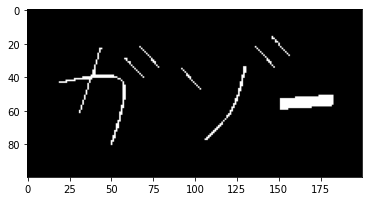

In [12]:
# read image
img = cv2.imread('../gazo.png').astype(np.float32)

out = Zhang_Suen_thining(img)

plt.imshow(out, cmap='gray')
cv2.imwrite('out65.jpg', out)

True

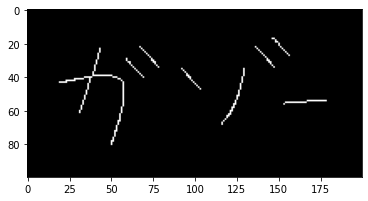

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Zhang Suen thining algorythm
def Zhang_Suen_thining(img):
    # get shape
    H, W, C = img.shape

    # prepare out image
    out = np.zeros((H, W), dtype=np.int)
    out[img[..., 0] > 0] = 1

    # inverse
    out = 1 - out

    while True:
        s1 = []
        s2 = []

        # step 1 ( rasta scan )
        for y in range(1, H-1):
            for x in range(1, W-1):
                
                # condition 1
                if out[y, x] > 0:
                    continue

                # condition 2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1,x+1]) == 1:
                    f1 += 1
                if (out[y+1, x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1

                if f1 != 1:
                    continue
                    
                # condition 3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or f2 > 6:
                    continue
                
                # condition 4
                if out[y-1, x] + out[y, x+1] + out[y+1, x] < 1:
                    continue

                # condition 5
                # out[y, x+1] は x4
                if out[y, x+1] + out[y+1, x] + out[y, x-1] < 1:  # 問題が間違っているのか？
                    continue
                    
                s1.append([y, x])

        for v in s1:
            out[v[0], v[1]] = 1

        # step 2 ( rasta scan )
        for y in range(1, H-1):
            for x in range(1, W-1):
                
                # condition 1
                if out[y, x] > 0:
                    continue

                # condition 2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1,x+1]) == 1:
                    f1 += 1
                if (out[y+1, x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1

                if f1 != 1:
                    continue
                    
                # condition 3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or f2 > 6:
                    continue
                
                # condition 4
                if out[y-1, x] + out[y, x+1] + out[y, x-1] < 1:
                    continue

                # condition 5
                if out[y-1, x] + out[y+1, x] + out[y, x-1] < 1:
                    continue
                    
                s2.append([y, x])

        for v in s2:
            out[v[0], v[1]] = 1

        # if not any pixel is changed
        if len(s1) < 1 and len(s2) < 1:
            break

    out = 1 - out
    out = out.astype(np.uint8) * 255

    return out


# read image
img = cv2.imread('../gazo.png').astype(np.float32)

out = Zhang_Suen_thining(img)

plt.imshow(out, cmap='gray')
cv2.imwrite('out65_ans.jpg', out)